In [70]:
import numpy as np
import sympy as smp
import scipy.io as sc
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import PillowWriter

In [71]:
t, g = smp.symbols('t g')
m1, m2 = smp.symbols('m1 m2')
L1, L2 = smp.symbols('L1, L2')

In [72]:
the1, the2 = smp.symbols(r'\theta_1, \theta_2', cls=smp.Function)

In [73]:
the1 = the1(t)
the2 = the2(t)


In [74]:
the1

\theta_1(t)

In [75]:

the1_d = smp.diff(the1, t)
the2_d = smp.diff(the2, t)
the1_dd = smp.diff(the1_d, t)
the2_dd = smp.diff(the2_d, t)

In [76]:

x1 = L1*smp.sin(the1)
y1 = -L1*smp.cos(the1)
x2 = L1*smp.sin(the1)+L2*smp.sin(the2)
y2 = -L1*smp.cos(the1)-L2*smp.cos(the2)

In [77]:

# Kinetic
T1 = 1/2 * m1 * (smp.diff(x1, t)**2 + smp.diff(y1, t)**2)
T2 = 1/2 * m2 * (smp.diff(x2, t)**2 + smp.diff(y2, t)**2)
T = T1+T2
# Potential
V1 = m1*g*y1
V2 = m2*g*y2
V = V1 + V2
# Lagrangian
L = T-V

In [78]:
L

L1*g*m1*cos(\theta_1(t)) - g*m2*(-L1*cos(\theta_1(t)) - L2*cos(\theta_2(t))) + 0.5*m1*(L1**2*sin(\theta_1(t))**2*Derivative(\theta_1(t), t)**2 + L1**2*cos(\theta_1(t))**2*Derivative(\theta_1(t), t)**2) + 0.5*m2*((L1*sin(\theta_1(t))*Derivative(\theta_1(t), t) + L2*sin(\theta_2(t))*Derivative(\theta_2(t), t))**2 + (L1*cos(\theta_1(t))*Derivative(\theta_1(t), t) + L2*cos(\theta_2(t))*Derivative(\theta_2(t), t))**2)

In [79]:
LE1 = (smp.diff(L, the1) - (smp.diff(smp.diff(L, the1_d), t))).simplify()
LE2 = (smp.diff(L, the2) - (smp.diff(smp.diff(L, the2_d), t))).simplify()

In [80]:
LE1

-1.0*L1*(L1*m1*Derivative(\theta_1(t), (t, 2)) + L1*m2*Derivative(\theta_1(t), (t, 2)) + L2*m2*sin(\theta_1(t) - \theta_2(t))*Derivative(\theta_2(t), t)**2 + L2*m2*cos(\theta_1(t) - \theta_2(t))*Derivative(\theta_2(t), (t, 2)) + g*m1*sin(\theta_1(t)) + g*m2*sin(\theta_1(t)))

In [81]:
LE2

1.0*L2*m2*(L1*sin(\theta_1(t) - \theta_2(t))*Derivative(\theta_1(t), t)**2 - L1*cos(\theta_1(t) - \theta_2(t))*Derivative(\theta_1(t), (t, 2)) - L2*Derivative(\theta_2(t), (t, 2)) - g*sin(\theta_2(t)))

In [82]:
sols = smp.solve([LE1, LE2], (the1_dd, the2_dd),
                simplify=False, rational=False)

In [83]:
dz1dt_f = smp.lambdify((t,g,m1,m2,L1,L2,the1,the2,the1_d,the2_d), sols[the1_dd])
dz2dt_f = smp.lambdify((t,g,m1,m2,L1,L2,the1,the2,the1_d,the2_d), sols[the2_dd])
dthe1dt_f = smp.lambdify(the1_d, the1_d)
dthe2dt_f = smp.lambdify(the2_d, the2_d)

In [84]:
def dSdt(S, t, g, m1, m2, L1, L2):
    the1, z1, the2, z2 = S
    return [
        dthe1dt_f(z1),
        dz1dt_f(t, g, m1, m2, L1, L2, the1, the2, z1, z2),
        dthe2dt_f(z2),
        dz2dt_f(t, g, m1, m2, L1, L2, the1, the2, z1, z2),
    ]

In [85]:
t = np.linspace(0, 40, 10001)
g = 9.81
m1=2
m2=2
L1 = 2
L2 = 1
ans = odeint(dSdt, y0=[np.pi-0.07, 0, 0, 0], t=t, args=(g,m1,m2,L1,L2))
t = np.reshape(t, (-1,1))
data = np.hstack([t, ans])
np.savetxt("dp.csv", data, delimiter=",")

In [86]:
t.shape

(10001, 1)

In [87]:
ans.T

array([[ 3.07159265e+00,  3.07158719e+00,  3.07157080e+00, ...,
        -1.42418506e+00, -1.41445660e+00, -1.40466985e+00],
       [ 0.00000000e+00, -2.73119796e-03, -5.46240519e-03, ...,
         2.41885754e+00,  2.44238666e+00,  2.44802582e+00],
       [ 0.00000000e+00, -1.08978506e-05, -4.35897561e-05, ...,
        -2.65149001e+01, -2.65626525e+01, -2.66103632e+01],
       [ 0.00000000e+00, -5.44886567e-03, -1.08968945e-02, ...,
        -1.19304009e+01, -1.19393661e+01, -1.19095540e+01]])

In [88]:
the1 =  (np.arctan2(np.sin(ans.T[0]), np.cos(ans.T[0]))*180)/np.pi
the2 = (np.arctan2(np.sin(ans.T[2]), np.cos(ans.T[2]))*180)/np.pi

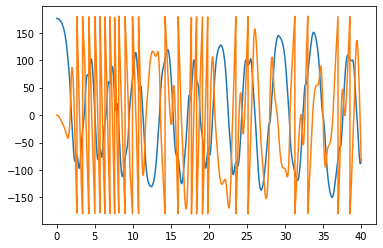

In [89]:
plt.plot(t, the1)
plt.plot(t, the2)
plt.show()

In [90]:
def get_x1y1x2y2(t, the1, the2, L1, L2):
    return (L1*np.sin(the1),
            -L1*np.cos(the1),
            L1*np.sin(the1) + L2*np.sin(the2),
            -L1*np.cos(the1) - L2*np.cos(the2))

x1, y1, x2, y2 = get_x1y1x2y2(t, ans.T[0], ans.T[2], L1, L2)

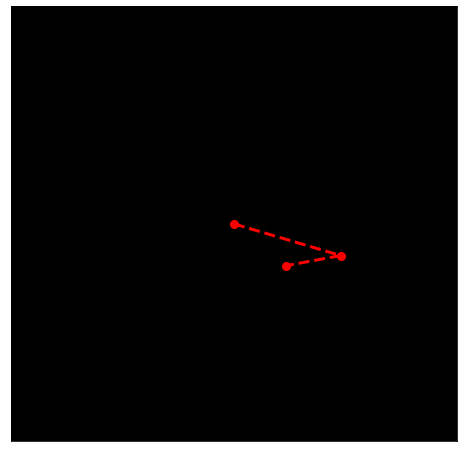

In [91]:
def animate(i):
    ln1.set_data([0, x1[i], x2[i]], [0, y1[i], y2[i]])
    
fig, ax = plt.subplots(1,1, figsize=(8,8))
ax.set_facecolor('k')
ax.get_xaxis().set_ticks([])    # enable this to hide x axis ticks
ax.get_yaxis().set_ticks([])    # enable this to hide y axis ticks
ln1, = plt.plot([], [], 'ro--', lw=3, markersize=8)
ax.set_ylim(-4,4)
ax.set_xlim(-4,4)
ani = animation.FuncAnimation(fig, animate, frames=1000, interval=50)
ani.save('pen.gif',writer='pillow',fps=25)